> 『파이썬 머신러닝 완벽 가이드』를 공부하고 정리한 글입니다.

In [1]:
# 사이킷런 버전 확인
import sklearn
sklearn.__version__

'0.23.2'

# 01 데이터 분류 프로세스
#### 0. 데이터셋 준비 및 관련 모듈 로드
- 분석에 사용할 데이터와 라이브러리 불러오기
#### 1. 데이터셋 분리 : train_test_split()
- 데이터를 학습데이터와 테스트 데이터로 분리
#### 2. 모델 학습 : fit()
- 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델 학습
#### 3. 예측 수행: predict()
- 학습된 모델을 이용해 테스트데이터 분류, 예측 수행
#### 4. 평가 : accuracy_score()
- 예측값과 테스트데이터의 실제값 비교를 통한 성능 평가

### 0. 데이터셋 준비 및 관련 모듈 로드

In [5]:
# 붓꽃 데이터 셋
from sklearn.datasets import load_iris
# ML 알고리즘- 의사결정트리 알고리즘 수행하기위한 클래스
from sklearn.tree import DecisionTreeClassifier
# 데이터 세트를 학습 데이터와 테스트 데이터로 분리하기 위한 API
from sklearn.model_selection import train_test_split
# 데이터 처리를 위한 라이브러리
import pandas as pd
import numpy as np
# 붗꽃 데이터 세트 로딩
iris = load_iris()

#iris['data']는 Iris데이터 세트에서 feature만으로 된 데이터를 numpy로 갖고있음.
iris_data = iris['data']

# iris['target']은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 갖고있음.
iris_label = iris.target
print('iris target 값 :', iris_label)
print('iris target 명 :', iris.target_names) # target_names는 레이블에 해당하는 이름(0:setosa, 1:versicolor, 2:virginica)

# 붗꽃 데이터 세트를 자세히 보기 위해 DF로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 1. 데이터셋 분리
train_test_split(
         feature_data_set(피처로 사용할 데이터(x)), label_data_set(레이블로사용할 데이터(y)), 
         test_size=전체 데이터셋 중 테스트 데이터셋의 크기, random_state=난수값 지정)


In [8]:
# 피처 데이터 세트로 iris_data, 레이블 데이터로 iris_lable 이용
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

# train 이 학습용
# test가 검사용

### 2. 모델 학습
- 머신러닝 분류 알고리즘 : 의사결정트리 이용 DecisionTreeClassifier()

In [9]:
# DecisionTreeClassifier 객체 생성
# random_state 역시 예제 코드 수행시마다 동일한 학습/예측결과를 출력하기 위해 같은 랜덤값을 뽑겠다는 의미
dt_clf = DecisionTreeClassifier(random_state=11)


# 모델 학습 : fit() -> 생성된 DecisionTreeClassifier 객체의 fit() 메소드를 이용해 학습 수행
dt_clf.fit(X_train, y_train) # 학습 데이터 X_train, y_train을 기반으로 학습 완료!

DecisionTreeClassifier(random_state=11)

### 3. 예측 수행
- predict()
- 반드시 학습데이터 아닌 다른 데이터 이용해야한다. 일반적으로 test 데이터를 이용함.
- DecisionTreeClassifier 객체의 predict() 메서드로 테스트용 피처 데이터세트(X_test)를 입력하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환.

In [10]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터로 예측 수행
pred = dt_clf.predict(X_test)

###  4. 평가
- accuracy_score()
- 머신러닝 분류 모델의 성능 평가 지표 : Accuracy, Recall, Precision, F1 score 등
- 여기서는 정확도(Accuracy) 이용

In [11]:
# 예측 결과를 기반으로 의사결정트리 기반 모델의 예측 성능을 평가
# 정확도 측정을 위해 제공하는 함수 accuracy_score
from sklearn.metrics import accuracy_score

# y_test : 실제값, pred : 예측값
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


# 02 교차 검증
- 'test set에 과적합 되는 문제'는 test set이 데이터 중 일부분으로 고정되어있고, 이 일부분의 데이터 셋에 대해 성능이 잘 나오도록 파라미터를 반복적으로 튜닝하기 때문에 발생.
- 교차검증은 데이터의 모든 부분을 사용하여 모델을 검증하고, test set을 하나로 고정하지 않음.
- 모델이 잘 적합되었는지 알아보기 위해 충분한 평과 과정을 통해 좋은 성능의 모델을 만들고자 실시한다.
- 데이터의 편중을 막아준다. (과적합 방지)
- 기본적인 교차 검증 방법 : K-fold 교차 검증


### K-fold 교차검증
- K개의 데이터 fold 세트를 만들어서 다시 K개로 쪼갠 후, K-1개는 train으로 나머지 한개는 Validation data로 사용하여 성능을 구한다.
- 쉽게 말해서, **test set을 하나로 고정하지 않고, K개의 데이터셋을 만든 후, K번만큼 학습(k번째), 검증(k-1개)을 수행하는 방법**
- 예를 들면, **1번째**: 1번째 데이터셋으로 검증, 나머지 k-1개의 데이터셋으로 학습, **2번째**: 2번째 데이터셋으로 검증, 나머지 k-1개의 데이터셋으로 학습, ...,**k번째**: k번째 데이터셋으로 검증, 나머지 k-1개의 데이터셋으로 학습 -> 총 k번 수행하는것. 
- k번 반복 후 성능의 평균을 낸다.


- 장: 좀더 일반화된 모델을 만들 수 있다.
- 단: Iteration 횟수가 많기 때문에 모델 훈련/평가 시간이 오래걸림.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

# iris 데이터 셋과 DecisionTreeClassifier 생성하기
iris = load_iris()
features = iris.data # 독립 변수
label = iris.target # 종속 변수
dt_clf = DecisionTreeClassifier(random_state = 156) # 같은 랜덤값을 뽑고자 random state 설정하여 모델 생성.


# 5개의 fold set로 분리하는 KFold 객체
kfold = KFold(n_splits=5)

# fold set 별 정확도를 담을 리스트 객체 생성
cv_accuracy = []
print("붓꽃 데이터 세트 크기:",features.shape[0]) # shape[0]은 행 길이

붓꽃 데이터 세트 크기: 150


In [13]:
features.shape

(150, 4)

In [14]:
n_iter = 0

#KFold 객체의 split()를 호출하면 Fold 별 학습용, 검증용 set의 row 인덱스를 array로 반환함.
for train_index, test_index in kfold.split(features):  # features(독립변수)를 k개의 fold로 나눠서 각 학습용과 검증용 set의 row 인덱스 반환.
    # kfold.split()으로 반환된 인덱스 train_index, test_index를 이용해서 학습용, 검증용 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습용 데이터셋으로 학습 
    dt_clf.fit(X_train, y_train) 
    #예측값 저장
    pred = dt_clf.predict(X_test) # 학습된 모델 dt_clf로 X_test 예측하여 결과값 pred에 저장.
    n_iter += 1
    
    # 반복시마다 정확도 측정해서 출력
    accuracy = np.round(accuracy_score(y_test, pred), 4) # 예측값 pred와 실제 label값 y_test를 비교하여 정확도 4자리 반올림.
    train_size = X_train.shape[0] # 학습용 set의 행 개수
    test_size = X_test.shape[0] # 검증용 set의 행 개수
    print('\n#{0} 교차 검증 정확도 : {1}, 학습데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('\n#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index)) # 검증용 데이터셋 test_index(예상; 150개 중 1/5이니까 30개 출력)
    cv_accuracy.append(accuracy) # 매 fold별 정확도를 저장
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도:  0.9


## Stratified K-fold 교차 검증

#### label의 분포가 불균형한 상황에서 index 순으로 fold set를 구성하는 것은 데이터를 검증하는데 **치명적인 오류**를 야기할 수 있음.
#### 이러한 데이터 label의 분포까지 고려하여(그렇기 때문에 **데이터 fold set를 구성해주는 함수에서 데이터의 label 값이 요구됨**) 각 훈련/검증 fold의 분포가 전체 data set의 분포에 근사하게 된다.

- 불균형한 분포도를 가진 레이블 데이터를 위한 K-fold 방식 (특정 레이블이 너무 많거나/희소한 경우)
- label 데이터의 분포가 각 클래스 별로 불균형을 이룰 때 유용하게 사용됨.
- 레이블 데이터의 분포도에 따라 train, validation으로 나눔.

- 주로 분류 문제에서 stratified K-fold 사용. 
- **회귀에서는 지원X** -> 회귀 결정값은 이산값 형태의 레이블이 아니라, **연속된 숫자값**이기 때문에 결정값 별로 분포를 정하는 의미 X

- k개의 fold로 나눈 후, 한 fold에서 k번째 검증용과 k-1개의 학습용으로 분리한다. 그리고 각 fold 안에서 class별 분배는 전체 데이터셋의 class 분포(불균형한)와 근사하도록 나눈다.
- **예**를 들어, 150개의 데이터, k=3이라면, 1번째가 검증용이라면, k-1(2)개가 학습용이다.\
그리고 학습용 100개 중 train data의 class의 불균형한 분포를 근사하도록 class별(0,1,2)로 분배한다.\
검증용도 마찬가지로, 50개 중 label 데이터의 class의 불균형한 분포를 근사하도록 class별 (0,1,2)로 분배한다.

In [15]:
# iris data의 레이블 분포 확인
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts() # 레이블 값의 분포도: 0, 1, 2값 모두 50개 동일

2    50
1    50
0    50
Name: label, dtype: int64

In [16]:
# K-fold 교차 검증 시 레이블 분포도
# 교차 검증 시마다 3개의 fold 세트로 만들어지는 학습레이블과 검증 레이블이 완전 다르게 추출

kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df): # 3개의 fold로 나누고 train과 test index 반환
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index] # 3개의 fold로 나눠진 set 중 1/3 개의 index
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())
    
# 검증 예측 정확도 0 -> 어떻게 알지?

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    50
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    50
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    50
Name: label, dtype: int64


In [17]:
# Stratified K-fold 교차 검증 시 레이블 분포도

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

# label 데이터의 분포도에 따라 학습/검증 데이터를 fold로 나누기위해 label 데이터셋도 인자로 넣어줌.
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index] # 3개의 fold로 나눠진 set 중 1/3 개의 index
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())
    
    
# 학습 레이블(!00개)과 검증 레이블(50개) 데이터 값의 분포도가 동일하게 할당
# K-fold로 분할된 레이블 data set이 전체 label 값의 분포도를 반영하지 못하는 문제를 해결.

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    17
1    17
0    16
Name: label, dtype: int64


In [18]:
# Stratified K-fold 교차 검증 수행 및 정확도 계산

dt_clf = DecisionTreeClassifier(random_state = 156) 
skfold = StratifiedKFold(n_splits=3)

# fold set 별 정확도를 담을 리스트 객체 생성
cv_accuracy = []
n_iter = 0

#KFold 객체의 split()를 호출하면 Fold 별 학습용, 검증용 set의 row 인덱스를 array로 반환함.
for train_index, test_index in skfold.split(features, label):  # features(독립변수)를 k개의 fold로 나눠서 각 학습용과 검증용 set의 row 인덱스 반환.
    # kfold.split()으로 반환된 인덱스 train_index, test_index를 이용해서 학습용, 검증용 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습용 데이터셋으로 학습 
    dt_clf.fit(X_train, y_train) 
    #예측값 저장
    pred = dt_clf.predict(X_test) # 학습된 모델 dt_clf로 X_test 예측하여 결과값 pred에 저장.
    n_iter += 1
    
    # 반복시마다 정확도 측정해서 출력
    accuracy = np.round(accuracy_score(y_test, pred), 4) # 예측값 pred와 실제 label값 y_test를 비교하여 정확도 4자리 반올림.
    train_size = X_train.shape[0] # 학습용 set의 행 개수
    test_size = X_test.shape[0] # 검증용 set의 행 개수
    print('\n#{0} 교차 검증 정확도 : {1}, 학습데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('\n#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index)) # 검증용 데이터셋 test_index(예상; 150개 중 1/5이니까 30개 출력)
    cv_accuracy.append(accuracy) # 매 fold별 정확도를 저장
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 교차 검증별 정확도 : ', np.round(cv_accuracy,4))
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습데이터 크기 : 100, 검증 데이터 크기 : 50

#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습데이터 크기 : 100, 검증 데이터 크기 : 50

#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습데이터 크기 : 100, 검증 데이터 크기 : 50

#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 :  [0.98 0.94 0.98]

## 평균 검증 정확도:  0.9666666666666667


##  Cross_val_score()
- 교차검증을 조금 더 편리하게 수행 가능
- K-Fold로 데이터를 **학습하고 예측**하는 과정을 한꺼번에 수행해주는 API
- 선언 형태\
 **cross_val_score(estimator, 피처 dataset X, 레이블 datasety=None, 예측 성능 평가 지표 scoring = None, 교차검증 폴드 수 cv = None, n_jobs = 1, verbose = 0, fit_params = None, pre_dispatch='2*n_jobs')**


- n_jobs : int형. 병행으로 수행할 jobs 수
- verbose : verbosity(다변) 레벨
- fit_params : dict형. Parameters to pass to the fit method of the estimator
- pre_dispatch : int/str형. 병렬 실행 중에 전송되는 작업 수 제어
- **예시**\
estimator는 의사결정나무 객체인 dt_clf로 , feature dataset은 data, label dataset은 label, 예측 성능 평가 지표는 'accuracy'(정확도), 교차검증 폴드 수는 3개\
=> scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv = 3)

In [19]:
from sklearn.tree import DecisionTreeClassifier # 분류모델 DT
# K-Fold로 데이터 학습,예측 과정을 한꺼번에 수행해주는 API 'cross_val_score'와  
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris # iris데이터 로드

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)
data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개! 다중
# 의사결정나무 객체인 dt_clf를 estimator로, feature dataset은 data, label dataset은 label, 예측 성능 평가 지표는 'accuracy'(정확도), 교차검증 폴드 수는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv = 3) 
# 반환값: scoring 파라미터로 지정된 성능지표(accuracy) 측정값을 배열 형태로 반환.
# array([0.98, 0.94, 0.98])
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


## cross_validate : 다중 평가 지표
- 여러개의 평가 지표를 사용하려면 새롭게 추가된 cross_validate() 함수를 사용. 
- cross_val_score()와 마찬가지로 scoring 매개변수에서 평가 지표를 지정할 수 있음.
- 리스트 혹은 튜플 형태도 가능하지만, 이름 지정하고 싶은 경우 dictionary 형태로 평가지표 지정!
- **예시** (SVC를 estimator로, feature는 X_train, label은 y_train, 예측 성능 평가지표는 accuracy와 roc_auc, \
cross_validate(SVC(gamma='auto'), X_train, y_train, scoring={'acc':'accuracy', 'ra':'roc_auc'}, return_train_score=False, cv=3)


- 테스트 폴드에 대한 점수 뿐만 아니라 '훈련 폴드'에 대한 점수도 반환함. 
- return_train_score 매개변수에서 명시적으로 훈련 폴드의 점수를 받을지 여부를 설정하는 것이 좋음. -> 오류 메시지X

# GridSearchCV()
1. 파라미터 vs 하이퍼 파라미터
- 파라미터 : 모델 자체적으로 결정되는 변수. 가중치라고도 함. ex)선형회귀의 계수\
  파라미터(weight)는 학습 과정에서 조정.
  
- 하이퍼 파라미터 : 사용자에 의해 결정되는 변수. ex)랜덤포레스트 모델 - 트리의 개수, 트리의 깊이 / 딥러닝 모델 - layer의 개수, 학습 횟수의 수\
  하이퍼 파라미터는 사용자가 고정한 값으로 학습.
  
- 데이터마다 최적의 하이퍼 파라미터가 다르며, 성능을 높일 수 있는 방법이기 때문에 **하이퍼 파라미터 튜닝**이 필요함.
- GridSearch와 RandomSearch가 대표적인 하이퍼 파라미터 튜닝.

2. GridSearchCV()
- 하이퍼 파라미터로 적용해볼 값들을 미리 정하여 모든 조합을 시행. 간단하지만 하이퍼 피라미터의 개수가 많을 수록 시간이 오래 걸림
- GridSearchCV API를 활용하면 **교차 검증과 하이퍼 파라미터 튜닝이 동시에 가능**함.
- ex) \
'criterion:['gini','entropy'],\
'n_estimators':[50,70,90,110],\
'max_depth':[3,5,7,10],\
'max_features':[0.8,0.85,0.9]\
=> 2X4X4X3 = 96 : 96번을 반복하여 최적의 하이퍼 파라미터를 찾음.

3. GridSearchCV() 주요 파라미터
- estimator : Classifier, Regressor, Pipeline 등 사용됨
- param_grid : key-리스트 형태의 딕셔너리로 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정
- scoring : 예측 성능을 측정할 평가 방법 지정. 정확도를 측정하는 accuracy 등 성능 평가 지표 함수 지정
- cv : 교차 검증 폴드 수
- refit : 기본은 True. GridSearchCV를 사용하여 찾은 최적의 하이퍼 파라미터 값을 estimator 객체에 적용하여 다시 학습할지를 묻는 부분.
- n_jobs : 코드 실행할 때 몇 개의 코어를 쓸 것인지 지정 (-1인 경우, 컴퓨터 코어 전부 사용-> 속도 향상)
- verbose : 실행결과 출력에 대한 설정 (0:출력 안함, 1:마지막결과만 출력, 2:매 시도마다 출력)

In [2]:
# GridSearchCV() 실습
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 데이터 로딩 후, 학습데이터와 테스트 데이터 8:2 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

# parameter들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
parameters

{'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

In [6]:
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행 설정

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001754,0.000458,0.000671,0.000485,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.002002,0.000065,0.002587,0.002150,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.002167,0.000258,0.001185,0.000604,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.001646,0.000541,0.000981,0.000030,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.007676,0.009549,0.001647,0.000917,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.001343,0.000464,0.000975,0.000033,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


In [7]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [9]:
from sklearn.metrics import accuracy_score

estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


# RandomSearchCV()

In [10]:
# GridSearch와 RandomSearch 비교 실습
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=66)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print(tree.score(X_test, y_test))  # 하이퍼 파라미터 튜닝 이전 모델 성능

0.8951048951048951


In [11]:
dt = DecisionTreeClassifier(random_state = 0)

param_grid = {'criterion':['gini', 'entropy'],
                           'max_depth':[4,5,6,8,10],
             'min_samples_leaf':[3,5,10,50,100]}

gcv = GridSearchCV(dt, param_grid = param_grid, cv=3, scoring='accuracy')
gcv.fit(X_train, y_train)
print('final params', gcv.best_params_)
print('best score', gcv.best_score_)
print(gcv.score(X_test, y_test))

final params {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}
best score 0.9460093896713615
0.916083916083916


# 데이터 전처리 

In [27]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레읹','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()

encoder.fit(items)
labels = encoder.transform(items)
print('레이블 인코딩 변환값:',labels)

레이블 인코딩 변환값: [0 1 4 5 3 3 2 2]


In [28]:
print('레이블 인코딩 클래스:',encoder.classes_)

print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

레이블 인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레읹' '컴퓨터']
디코딩 원본값: ['전자레읹' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [30]:
#원 핫 인코딩

from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

labels = labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

In [31]:
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [32]:
oh_labels.shape

(8, 6)

In [33]:
import pandas as pd
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [34]:
# iris 데이터셋 준비

from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [35]:
# 원본 데이터 확인 
print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


## StandardScaler - 표준정규분포 데이터표준화
- 데이터 분석을 할 때, 변수의 척도(scale)가 서로 다른 경우, 직접적으로 상호 비교할 수 없게됩니다. 
- 모델링에서는 척도(scale)가 다름으로 인해서 모수의 왜곡이 생길 수 있습니다.
- 따라서 모델링 작업에 들어가기 전에 변수들 간의 척도가 다른 경우, 보통 표준화(scale standization)를 진행합니다.
- 표준화 중에서도 모집단이 정규분포를 따르는 경우 평균이 0, 표준편차가 1인 **표준정규분포**로 표준화하는 방법이 많이 사용됩니다. -> sklearn.preprocessing: StandardScaler().fit_transform()

In [37]:
# StandardScaler : 평균0, 분산 1인 정규분포를 따르도록 변환

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)

# 변환된 데이터 확인
print('')
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())


feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [38]:
# MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)

# 변환된 데이터 확인
print('')
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())


feature들의 평균 값
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

feature들의 분산 값
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


In [40]:
# 피처 스케일링 유의점
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)
print(train_array)
print(test_array)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [42]:
scaler = MinMaxScaler()
scaler.fit(train_array)

train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Scaled train_array 데이터:',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scaled train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [45]:
# 잘못된 테스트 데이터 스케일링

scaler.fit(test_array)

test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터', np.round(test_array.reshape(-1),2))
print('Scaled test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터 [0 1 2 3 4 5]
Scaled test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [46]:
# 올바른 테스트 데이터 스케일링
scaler = MinMaxScaler()
scaler.fit(train_array)

train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Scaled train_array 데이터:',np.round(train_scaled.reshape(-1),2))

test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터', np.round(test_array.reshape(-1),2))
print('Scaled test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scaled train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터 [0 1 2 3 4 5]
Scaled test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


#  사이킷런 활용

In [47]:
#titanic data 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [48]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [49]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace=True) # an으로 변환
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [50]:
# 전처리 된 데이터 확인하기
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
E101             3
              ... 
C86              1
E50              1
B102             1
B73              1
E31              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [51]:
# 전체 데이터 전처리하는 함수 만들기
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

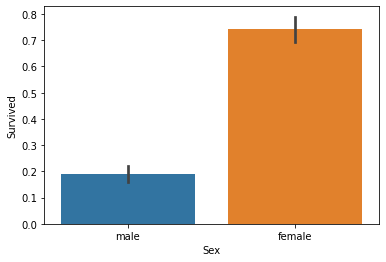

In [54]:
# 성별 객실 등급별 생존 확률 시각화

titanic_df.groupby(['Sex','Survived'])['Survived'].count()

sns.barplot(x = 'Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

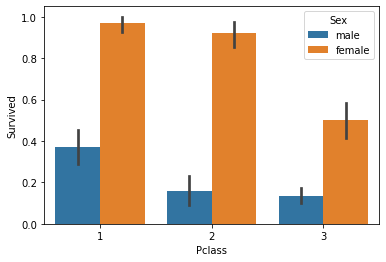

In [55]:
sns.barplot(x='Pclass', y='Survived',hue='Sex',data=titanic_df)

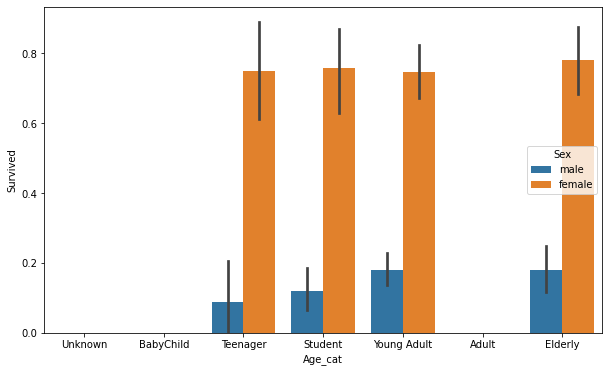

In [57]:
# Age에 따라 분류. 그에 대한 생존확률
def get_category(age):
    cat=''
    if age <= -1: cat='Unknown'
    elif age <=5 : cat='Baby'
    elif age <=12 : cat='Child'
    elif age <=18 : cat='Teenager'
    elif age <=25 : cat='Student'
    elif age <=35 : cat='Young Adult'
    elif age <=0 : cat='Adult'
    else: cat='Elderly'
    return cat

plt.figure(figsize=(10,6))
group_names = ['Unknown', 'Baby' 'Child', 'Teenager', 'Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex',data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [61]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 :{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 :{0:.4f}'.format(accuracy_score(y_test, dt_pred)))


DecisionTreeClassifier 정확도 :0.7877
RandomForestClassifier 정확도 :0.7877
LogisticRegression 정확도 :0.7877


C:\Users\banan\.conda\envs\dsfs\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
# Kfold 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [66]:
# cross_val_score() 적용

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("고차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

고차 검증 0 정확도 : 0.7430
고차 검증 1 정확도 : 0.7753
고차 검증 2 정확도 : 0.7921
고차 검증 3 정확도 : 0.7865
고차 검증 4 정확도 : 0.8427
평균 정확도: 0.7879


In [68]:
# GridSearchCV 적용

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
